In [1]:
import numpy as np
from scipy import optimize
from scipy.special import jve as jv, yve as yv
import matplotlib.pyplot as plt
import fields

$$
\left(\begin{array}{cccc}
\sqrt{\varepsilon_2} J_{\ell} & 0 & - \sqrt{\varepsilon_1}H_{\ell}^{(1)} & 0 \\
n_2 \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \sqrt{\varepsilon_2} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & - \sqrt{\varepsilon_1}\frac{\ell \beta}{\kappa_2^2 r_0} H_{\ell}^{(1)} & -\mathrm{i}  \sqrt{\varepsilon_1}\frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} \\
0 & J_{\ell} & 0 & -H_{\ell}^{(1)} \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{\ell}^{\prime} & \frac{\ell \beta}{\kappa_1^2 r_0} J_{\ell} & \mathrm{i} \frac{k_2}{\kappa_2} H_{\ell}^{(1)^{\prime}} & -\frac{\ell \beta}{\kappa_2^2 r_0} H_l^{(1)}
\end{array}\right)
$$
$$\kappa_i=\sqrt{k^2_i-\beta^2}$$

$$
\left(\begin{array}{cccc}
n_2 J_{1}(\kappa_1r_0) & 0 & - n_1H_{1}^{(1)} (\kappa_2r_0)& 0 \\
n_2 \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} n_2 \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & - n_1\frac{\beta}{\kappa_2^2 r_0} H_{1}^{(1)}(\kappa_2r_0) & -\mathrm{i}  n_1\frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}} (\kappa_2r_0)\\
0 & J_{1}(\kappa_1r_0) & 0 & -H_{1}^{(1)}(\kappa_2r_0) \\
-\mathrm{i} \frac{k_1}{\kappa_1} J_{1}^{\prime}(\kappa_1r_0) & \frac{\beta}{\kappa_1^2 r_0} J_{1}(\kappa_1r_0) & \mathrm{i} \frac{k_2}{\kappa_2} H_{1}^{(1)^{\prime}}(\kappa_2r_0) & -\frac{\beta}{\kappa_2^2 r_0} H_l^{(1)}(\kappa_2r_0)
\end{array}\right)
$$

In [2]:
N=2001
x=np.linspace(5e-1,3,N,endpoint=False)[1:]
y=np.linspace(1,1.45,N,endpoint=False)[1:]
X, Y = np.meshgrid(x, y)
Z=fields.detA(Y,X)

In [3]:
Z

array([[ 6.43042381,  6.41230106,  6.39395207, ...,  1.08813454,
         1.13417011,  1.17770633],
       [ 5.49965217,  5.48146985,  5.46306188, ..., -0.05862811,
        -0.01060528,  0.03465526],
       [ 4.94977045,  4.9315445 ,  4.91309349, ..., -0.76496141,
        -0.71485115, -0.66779092],
       ...,
       [ 0.82691327,  0.82462682,  0.82234676, ..., -0.6041075 ,
        -0.60426143, -0.60441513],
       [ 1.00660707,  1.00433271,  1.00206475, ..., -0.51041325,
        -0.51064546, -0.51087742],
       [ 1.31202055,  1.30976252,  1.30751087, ..., -0.27191269,
        -0.27224367, -0.27257443]])

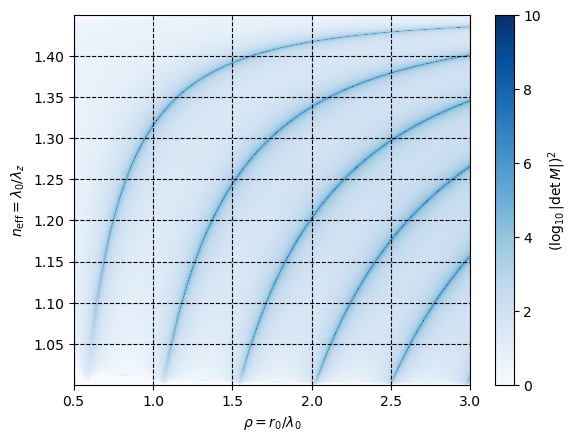

In [4]:
plt.pcolormesh(X,Y,-Z,cmap='Blues')
plt.colorbar(label=r'$(\log_{10}|\det{M}|)^2$')
plt.clim(vmax=10,vmin=0) 
plt.xlim(xmax=3,xmin=0.5) 
plt.grid(color='black', linestyle='--')
plt.ylabel(r'$n_\mathrm{eff}=\lambda_0/\lambda_z$')
plt.xlabel(r'$\rho=r_0/\lambda_0$')
plt.show()

In [5]:
# f=np.zeros_like(x)
# x1=1
# x2=1.45
# for i in range(90,len(x)):
#     f[i]=optimize.fminbound(func=fields.detA, x1=x1, x2=x2,args=(x[i],))
#     x1=f[i]
# x2=x1
# x1=1
# for i in range(90):
#     f[90-i]=optimize.fminbound(fields.detA, x1=x1, x2=x2,args=(x[90-i],))
#     x2=f[90-i]

In [6]:
Quo=1
bre=0
de=0
f=np.zeros_like(x)
x1=1
x2=1.45
for i in range(bre,len(x)):
    f[i]=optimize.fminbound(func=lambda l:-np.abs(fields.detA(l,x[i])+de)**Quo-de, x1=x1, x2=x2)
    x1=f[i]
# for i in range(bre):
#     f[i]=None
# np.argmax(np.diff(f))

In [7]:
g=np.zeros_like(x)
for i in range(len(x)):
    g[-i]=optimize.fmin(func=lambda l:-np.abs(fields.detA(l,x[-i])+de)**Quo-de,x0=f[-i],disp=0)
# for i in range(len(x)):
#     g[-i]=optimize.fmin(func=lambda l:-np.abs(fields.detA(l,x[-i])+de)**Quo-de,x0=g[-i],disp=0)


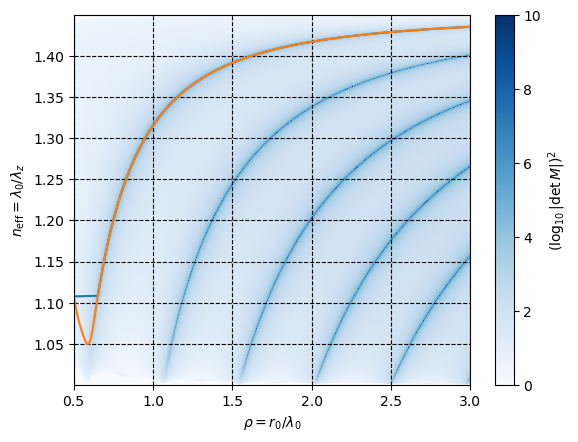

In [8]:
plt.pcolormesh(X,Y,-Z,cmap='Blues')
plt.xlim(xmax=3,xmin=0.5) 
plt.plot(x,f)
plt.plot(x,g)
# plt.ylim(1,1.45)
plt.colorbar(label=r'$(\log_{10}|\det{M}|)^2$')
plt.clim(vmax=10,vmin=0) 
plt.grid(color='black', linestyle='--')
plt.ylabel(r'$n_\mathrm{eff}=\lambda_0/\lambda_z$')
plt.xlabel(r'$\rho=r_0/\lambda_0$')
# plt.axvline(x=x[2000-np.shape(f[f>1.05])[0]])
plt.show()

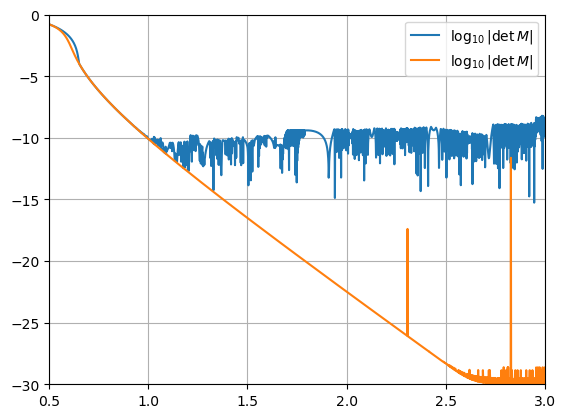

In [14]:
plt.plot(x,(fields.detA(f,x)),label=r'$\log_{10}|\det{M}|$')
plt.plot(x,(fields.detA(g,x)),label=r'$\log_{10}|\det{M}|$')

plt.xlim(xmax=3,xmin=0.5) 
plt.ylim(ymin=-30,ymax=0) 
plt.legend()
plt.grid()
plt.show()

In [17]:
(w,v)=np.linalg.eig(fields.M(g[1000],x[1000]))
np.min(np.abs(w))
v[np.argmin(np.abs(w))]

5.048027780744011e-10


array([-5.56522509e-12-2.49735689e-11j,  9.42350427e-01+0.00000000e+00j,
        9.42351163e-01+0.00000000e+00j,  9.29992239e-01+0.00000000e+00j])

In [19]:
np.shape((v[np.argmin(np.abs(w))],v[np.argmin(np.abs(w))]))

(2, 4)

In [24]:
np.zeros([len(x),4])[0,:]

array([0., 0., 0., 0.])

In [27]:
V=np.zeros([len(x),4])
W=np.zeros_like(x)
for i in range(len(x)):
    (w,v)=np.linalg.eig(fields.M(g[i],x[i]))
    W[i]=np.min(np.abs(w))
    V[i,:]=v[np.argmin(np.abs(w))]

/tmp/ipykernel_60830/3806719624.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  V[i,:]=v[np.argmin(np.abs(w))]


In [34]:
V[1,:]

array([ 0.21477388, -0.56903564,  0.01342097, -0.24960208])